#### Dataset was documented in the previous assignment

### Questions from the previous homework assignment: 

1) What is the most common vehicle (model and make) - based on the maximum number of vehicles - found in each state, and how does this trend vary among the maximum number of most common vehicles in different states?

2) How has an electric vehicle's range (number of miles an electric vehicle can travel on a fully charged battery or a single charge) changed throughout the years (1997-2024)? Has this range improved or worsened? 


In [49]:
import pandas as pd 
import numpy as np
# Load the data
data = pd.read_csv('../data/raw/Electric_Vehicle_Population_Data.csv')
data.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,KM8K33AGXL,King,Seattle,WA,98103.0,2020,HYUNDAI,KONA,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,258,0,43.0,249675142,POINT (-122.34301 47.659185),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303300e+10
1,1C4RJYB61N,King,Bothell,WA,98011.0,2022,JEEP,GRAND CHEROKEE,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,25,0,1.0,233928502,POINT (-122.20578 47.762405),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10
2,1C4RJYD61P,Yakima,Yakima,WA,98908.0,2023,JEEP,GRAND CHEROKEE,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,25,0,14.0,229675939,POINT (-120.6027202 46.5965625),PACIFICORP,5.307700e+10
3,5YJ3E1EA7J,King,Kirkland,WA,98034.0,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215,0,45.0,104714466,POINT (-122.209285 47.71124),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10
4,WBY7Z8C5XJ,Thurston,Olympia,WA,98501.0,2018,BMW,I3,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,97,0,22.0,185498386,POINT (-122.89692 47.043535),PUGET SOUND ENERGY INC,5.306701e+10


Columns I will be extracting/transforming/normalizing from the dataset:

* State: keep values as string values
* Model Year: transform values to an integer
* Make: keep values as string values
* Model: keep values as string values
* Electric Vehicle Type: normalize values from 'Battery Electric Vehicle (BEV)' and 'Plug-in Hybrid Electric Vehicle (PHEV)' to 'BEV' and 'PHEV'
* Clean Alternative Fuel Vehicle (CAFV) Eligibility: normalize values from 'Clean Alternative Fuel Vehicle Eligible', 'Not eligible due to low battery range' and 'Eligibility unknown as battery range has not been researched' to 'Y' (Yes - eligible), 'N' (No - not eligible) and 'Unknown'
* Electric Range: transform values to a float
* 2020 Census Tract: transform values to an integer 
    * All missing values are located in the '2020 Census Tract' column; therefore, missing values are filled in by 0 (integer)

The rest of the columns are dropped as they are not necessary to conduct my analysis. 

In [50]:
import pandas as pd

# Define the file path
file_path = '../data/raw/Electric_Vehicle_Population_Data.csv'

# Use pandas to read the CSV file into a DataFrame
df = pd.read_csv(file_path, usecols=[
    'State', 'Model Year', 'Make', 'Model', 
    'Electric Vehicle Type', 'Clean Alternative Fuel Vehicle (CAFV) Eligibility',
    'Electric Range', '2020 Census Tract' 
])

# Update 'Clean Alternative Fuel Vehicle (CAFV) Eligibility' column
eligibility_mapping = {
    'Clean Alternative Fuel Vehicle Eligible': 'Y',
    'Eligibility unknown as battery range has not been researched': 'Unknown',
    'Not eligible due to low battery range': 'N'
}
df['Clean Alternative Fuel Vehicle (CAFV) Eligibility'] = df['Clean Alternative Fuel Vehicle (CAFV) Eligibility'].map(eligibility_mapping)

# Update 'Electric Vehicle Type' column
df['Electric Vehicle Type'] = df['Electric Vehicle Type'].replace({
    'Battery Electric Vehicle (BEV)': 'BEV',
    'Plug-in Hybrid Electric Vehicle (PHEV)': 'PHEV'
})

# Since missing values ('') are in the '2020 Census Tract' column, replace empty values with 0
df['2020 Census Tract'].fillna(0, inplace=True)
# Convert the '2020 Census Tract' column to integer type
df['2020 Census Tract'] = df['2020 Census Tract'].astype(int)
# Convert data types where necessary
df['Model Year'] = df['Model Year'].astype(int)
df['Electric Range'] = df['Electric Range'].astype(float)

Add a new column to the dataset to calculate the vehicle age (current year - model year)

In [51]:
import datetime
# Add a 'Vehicle Age' column
current_year = datetime.datetime.now().year
df['Vehicle Age'] = current_year - df['Model Year']
# Print the first 6 rows of the updated DataFrame
df.head(6)

,State,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,2020 Census Tract,Vehicle Age
0,WA,2020,HYUNDAI,KONA,BEV,Y,258.0,53033004800,3
1,WA,2022,JEEP,GRAND CHEROKEE,PHEV,N,25.0,53033021804,1
2,WA,2023,JEEP,GRAND CHEROKEE,PHEV,N,25.0,53077002900,0
3,WA,2018,TESLA,MODEL 3,BEV,Y,215.0,53033021903,5
4,WA,2018,BMW,I3,PHEV,Y,97.0,53067010700,5
5,WA,2020,TESLA,MODEL 3,BEV,Y,266.0,53061940001,3


#### Summary Statistics

In [52]:
df.describe()

,Model Year,Electric Range,2020 Census Tract,Vehicle Age
count,150482.000000,150482.000000,1.504820e+05,150482.000000
mean,2020.005436,67.877839,5.297090e+10,2.994564
std,3.015209,96.230009,1.655804e+09,3.015209
min,1997.000000,0.000000,0.000000e+00,-1.000000
25%,2018.000000,0.000000,5.303301e+10,0.000000
50%,2021.000000,18.000000,5.303303e+10,2.000000
75%,2023.000000,97.000000,5.305307e+10,5.000000
max,2024.000000,337.000000,5.603300e+10,26.000000


### Q1 (Frequency/Value Counts)

To answer the first question, I will calculate the maximum frequency of vehicles for each state to determine the most common vehicle. I will then plot the data in a bar graph to better visualize the data. 

In [53]:
# Group by 'State', 'Make', and 'Model' and count the number of occurrences
vehicle_counts = df.groupby(['State', 'Make', 'Model']).size().reset_index(name='Frequency')
# Get the index of rows with the maximum frequency for each state
idx = vehicle_counts.groupby('State')['Frequency'].idxmax()
# Get the rows with the maximum frequency for each state
most_common_vehicles = vehicle_counts.loc[idx]
most_common_vehicles

,State,Make,Model,Frequency
0,AK,TESLA,MODEL Y,1
1,AL,CHEVROLET,BOLT EV,1
4,AP,NISSAN,LEAF,1
5,AR,NISSAN,LEAF,1
11,AZ,TESLA,MODEL 3,2
17,BC,TESLA,MODEL 3,1
35,CA,TESLA,MODEL 3,31
56,CO,TESLA,MODEL Y,2
57,CT,CHEVROLET,VOLT,2
66,DC,TESLA,MODEL Y,2


/var/folders/8s/4xrvxcw11kxdvw115jftrvp80000gn/T/ipykernel_86146/1695949754.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  palette = plt.cm.get_cmap('tab20c', len(most_common_vehicles['Make_Model'].unique()))


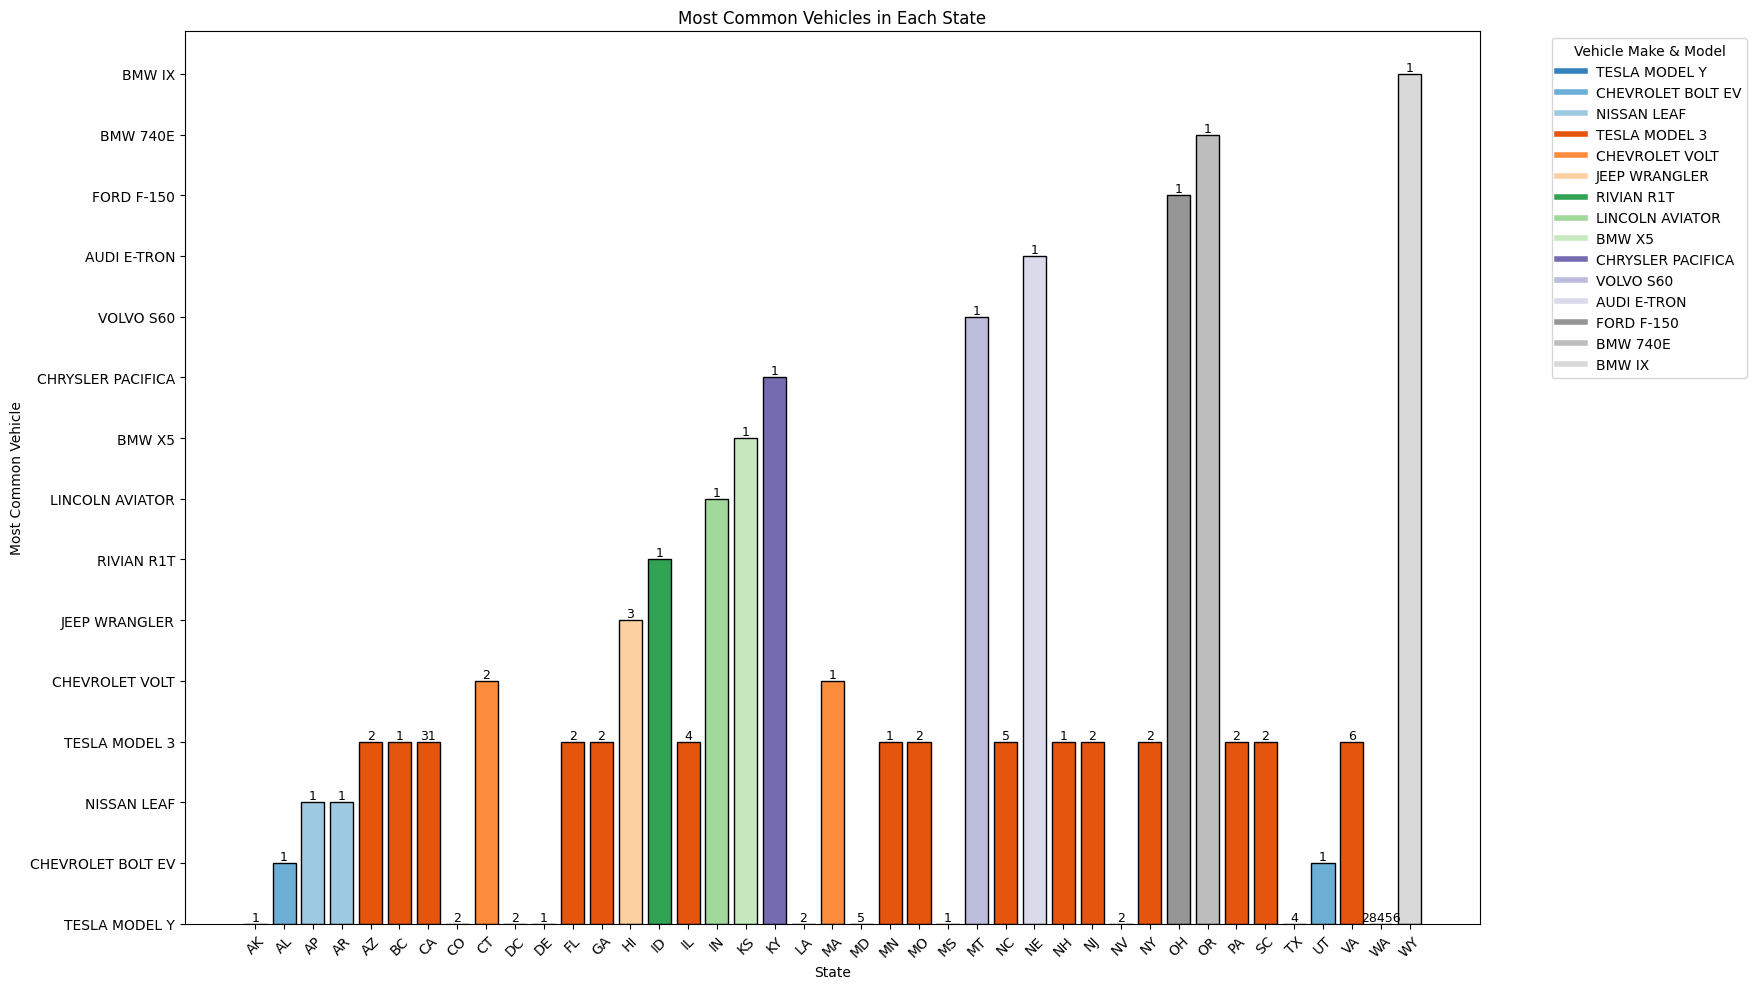

In [54]:
import matplotlib.pyplot as plt

# Combine 'Make' and 'Model' into a single column for labeling
most_common_vehicles['Make_Model'] = most_common_vehicles['Make'] + " " + most_common_vehicles['Model']

# Define a color palette for the vehicles
palette = plt.cm.get_cmap('tab20c', len(most_common_vehicles['Make_Model'].unique()))

# Create a color map for the vehicles
color_map = {vehicle: palette(i) for i, vehicle in enumerate(most_common_vehicles['Make_Model'].unique())}

# Plotting
plt.figure(figsize=(15, 10))
bars = plt.bar(most_common_vehicles['State'], most_common_vehicles['Make_Model'], 
               color=[color_map[vehicle] for vehicle in most_common_vehicles['Make_Model']],
               edgecolor='black')

# Label with frequency
for bar, freq in zip(bars, most_common_vehicles['Frequency']):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(freq), ha='center', va='bottom', fontsize=9)

plt.xlabel('State')
plt.ylabel('Most Common Vehicle')
plt.title('Most Common Vehicles in Each State')
plt.xticks(rotation=45)
plt.tight_layout()

# Create a custom legend
handles = [plt.Line2D([0], [0], color=color_map[vehicle], lw=4, label=vehicle) for vehicle in color_map]
plt.legend(handles=handles, title='Vehicle Make & Model', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()


### Q2 (Average Electric Range Every Year)

In [55]:
import matplotlib.pyplot as plt

# Group by 'Model Year' and calculate the average electric range
avg_range_per_year = df.groupby('Model Year')['Electric Range'].mean()
print(avg_range_per_year)

Model Year
1997     39.000000
1998     58.000000
1999     74.000000
2000     58.000000
2002     95.000000
2003     95.000000
2008    220.000000
2010    226.875000
2011     70.851759
2012     62.186160
2013     80.318222
2014     81.172710
2015     98.060195
2016    101.651858
2017    111.916608
2018    156.087875
2019    176.814314
2020    240.410926
2021     10.812942
2022      4.470449
2023      4.479409
2024     17.683801
Name: Electric Range, dtype: float64


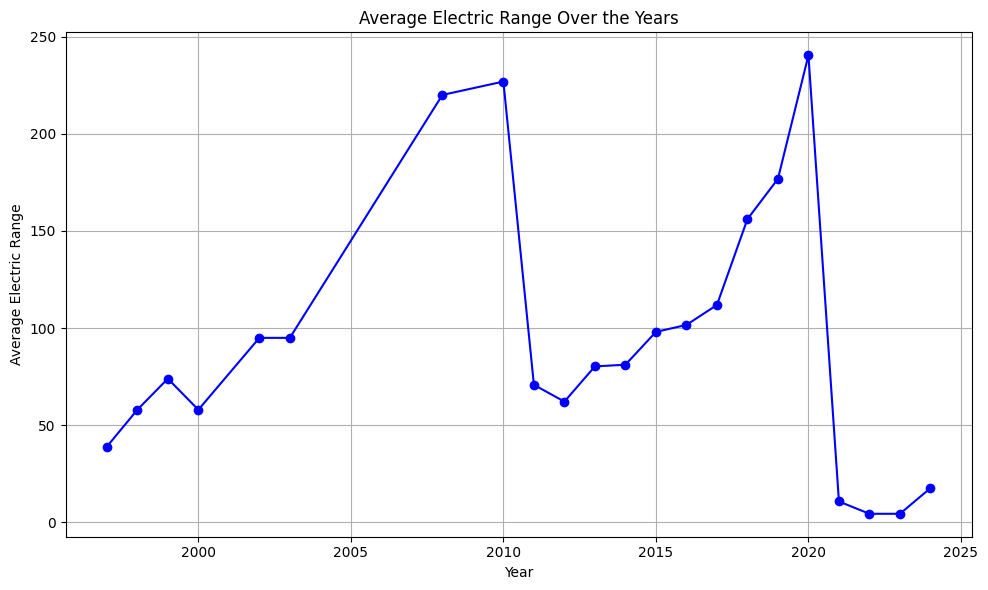

In [56]:
# Plotting
plt.figure(figsize=(10, 6))
avg_range_per_year.plot(kind='line', marker='o', color='blue')
plt.title('Average Electric Range Over the Years')
plt.xlabel('Year')
plt.ylabel('Average Electric Range')
plt.grid(True)
plt.tight_layout()
plt.show()

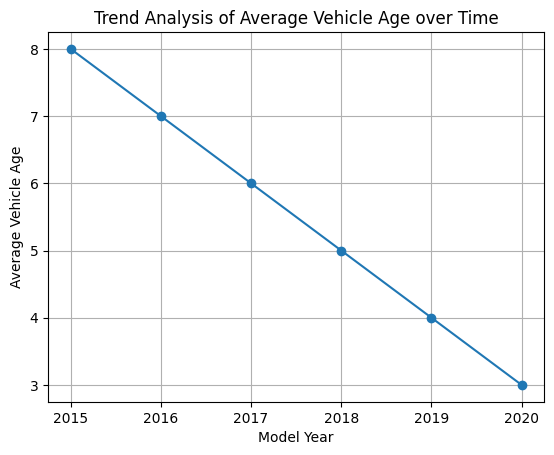

In [57]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample data
data = {
    'Model Year': [2020, 2019, 2018, 2020, 2017, 2016, 2015],
    'Make': ['Tesla', 'Hyundai', 'Toyota', 'Honda', 'Ford', 'Chevrolet', 'Nissan']
}
df = pd.DataFrame(data)

# Calculate vehicle age
current_year = pd.Timestamp.now().year
df['Vehicle Age'] = current_year - df['Model Year']

# Group by Model Year and calculate the average age
avg_age_per_year = df.groupby('Model Year')['Vehicle Age'].mean()

# Plotting
plt.plot(avg_age_per_year.index, avg_age_per_year.values, marker='o')
plt.title('Trend Analysis of Average Vehicle Age over Time')
plt.xlabel('Model Year')
plt.ylabel('Average Vehicle Age')
plt.grid(True)
plt.show()
